# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 

df1 = pd.read_csv("/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/data_F_3040.csv")
df2 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/뉴스심리지수(실험적 통계)_일별자료.csv' , encoding = 'cp949')
df3 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/datatrend.csv' ,encoding = 'cp949')
np.random.seed(19670324)  # seed 값 지정

In [2]:
# 열 이름 바꾸기
df2.rename(columns = {'날짜':'de_dt'},inplace=True)
df3.rename(columns = {'일':'de_dt'},inplace=True)

# 데이터 병합

In [3]:
df = df1.merge(df2 , on = 'de_dt', how = 'inner')
df = df.merge(df3 , on = 'de_dt', how = 'inner')

In [4]:
df.info() # info를 통해 병합 과정 중 누락된 데이터가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036659 entries, 0 to 1036658
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   cust          1036659 non-null  object 
 1   ma_fem_dv     1036659 non-null  object 
 2   ages          1036659 non-null  object 
 3   zon_hlv       1036659 non-null  object 
 4   rct_no        1036659 non-null  object 
 5   chnl_dv       1036659 non-null  int64  
 6   cop_c         1036659 non-null  object 
 7   br_c          1036659 non-null  object 
 8   pd_c          1036659 non-null  object 
 9   de_dt         1036659 non-null  object 
 10  de_hr         1036659 non-null  int64  
 11  buy_am        1036659 non-null  int64  
 12  buy_ct        1036659 non-null  int64  
 13  de_dt_month   1036659 non-null  int64  
 14  de_day        1036659 non-null  int64  
 15  pd_nm         1036659 non-null  object 
 16  clac_hlv_nm   1036659 non-null  object 
 17  clac_mcls_nm  1036659 non-n

# 상관분석을 통해서 외부 변수 활용 방안 모색

In [5]:
df.corr()

,chnl_dv,de_hr,buy_am,buy_ct,de_dt_month,de_day,뉴스심리지수,서울,경기,총합
chnl_dv,1.000000,-0.205176,-0.018465,0.003537,-0.237814,-0.058388,0.048241,0.068596,0.052879,0.060970
de_hr,-0.205176,1.000000,-0.011080,-0.001948,0.033068,0.007750,-0.003534,-0.008796,-0.007722,-0.008308
buy_am,-0.018465,-0.011080,1.000000,-0.001658,0.011040,0.025456,-0.003217,-0.008305,-0.007734,-0.008074
buy_ct,0.003537,-0.001948,-0.001658,1.000000,-0.001600,-0.005665,0.001269,0.001777,0.002123,0.001971
de_dt_month,-0.237814,0.033068,0.011040,-0.001600,1.000000,0.003612,-0.203273,-0.138947,-0.072182,-0.105333
de_day,-0.058388,0.007750,0.025456,-0.005665,0.003612,1.000000,0.004559,-0.254400,-0.239658,-0.248768
뉴스심리지수,0.048241,-0.003534,-0.003217,0.001269,-0.203273,0.004559,1.000000,0.078022,0.042752,0.060301
서울,0.068596,-0.008796,-0.008305,0.001777,-0.138947,-0.254400,0.078022,1.000000,0.968347,0.991537
경기,0.052879,-0.007722,-0.007734,0.002123,-0.072182,-0.239658,0.042752,0.968347,1.000000,0.992557
총합,0.060970,-0.008308,-0.008074,0.001971,-0.105333,-0.248768,0.060301,0.991537,0.992557,1.000000


In [6]:
# 필요한 열만 추출
df = df[['cust', 'pd_nm', 'buy_ct', 'buy_am','de_dt_month','de_day','총합','뉴스심리지수']]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

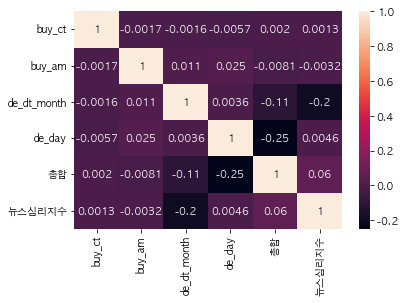

In [8]:
# 상관분석 히트맵
corr=df.corr()
sns.heatmap(corr, annot=True)

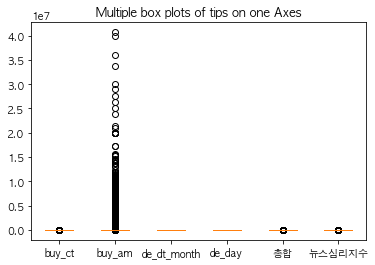

In [9]:
fig, ax = plt.subplots()
ax.boxplot([df['buy_ct'], df['buy_am'], df['de_dt_month'], df['de_day'], df['총합'], df['뉴스심리지수']])
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2, 3, 4, 5, 6],
           ['buy_ct', 'buy_am', 'de_dt_month', 'de_day', '총합', '뉴스심리지수'])
plt.show()

# 데이터 전처리 (로그화, 정규화)

In [10]:
# buy_am 값은 이상치가 너무 크고 최솟값과 최댓값 차이도 너무 크기 때문에 로그화를 하고 정규화 진행
df['buy_am'] = np.log(df['buy_am'])

In [11]:
#정규화 함수 및 적용 
def min_max_scaler(df):
    df_min = df.min()
    df_max = df.max()
    return (df-df_min)/(df_max-df_min)

In [12]:
df['buy_am'] = min_max_scaler(df['buy_am'])
df['buy_ct'] = min_max_scaler(df['buy_ct'])
df['de_dt_month'] = min_max_scaler(df['de_dt_month'])
df['de_day'] = min_max_scaler(df['de_day'])
df['총합'] = min_max_scaler(df['총합'])
df['뉴스심리지수'] = min_max_scaler(df['뉴스심리지수'])
df.head()

,cust,pd_nm,buy_ct,buy_am,de_dt_month,de_day,총합,뉴스심리지수
0,M000225114,일반스낵,0.0,0.516377,0.181818,0.166667,0.221591,0.425241
1,M000225114,일반스낵,0.0,0.540185,0.181818,0.166667,0.221591,0.425241
2,M000225114,일반스낵,0.0,0.512199,0.181818,0.166667,0.221591,0.425241
3,M003531710,일반스낵,0.0,0.417380,0.181818,0.166667,0.221591,0.425241
4,M006627098,일반스낵,0.0,0.417380,0.181818,0.166667,0.221591,0.425241


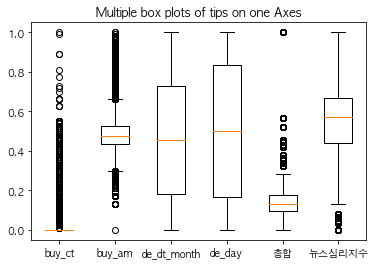

In [13]:
fig, ax = plt.subplots()
ax.boxplot([df['buy_ct'], df['buy_am'], df['de_dt_month'], df['de_day'], df['총합'], df['뉴스심리지수']])
plt.title('Multiple box plots of tips on one Axes')
plt.xticks([1, 2, 3, 4, 5, 6],
           ['buy_ct', 'buy_am', 'de_dt_month', 'de_day', '총합', '뉴스심리지수'])
plt.show()

# 파생변수 만들기

In [14]:
df['values'] = df['buy_ct'] + df['buy_am'] + df['de_dt_month'] + df['de_day'] + df['총합'] + df['뉴스심리지수']
df['values'] = min_max_scaler(df['values'])
df.head()

,cust,pd_nm,buy_ct,buy_am,de_dt_month,de_day,총합,뉴스심리지수,values
0,M000225114,일반스낵,0.0,0.516377,0.181818,0.166667,0.221591,0.425241,0.251112
1,M000225114,일반스낵,0.0,0.540185,0.181818,0.166667,0.221591,0.425241,0.258547
2,M000225114,일반스낵,0.0,0.512199,0.181818,0.166667,0.221591,0.425241,0.249808
3,M003531710,일반스낵,0.0,0.417380,0.181818,0.166667,0.221591,0.425241,0.220199
4,M006627098,일반스낵,0.0,0.417380,0.181818,0.166667,0.221591,0.425241,0.220199


<AxesSubplot:ylabel='Frequency'>

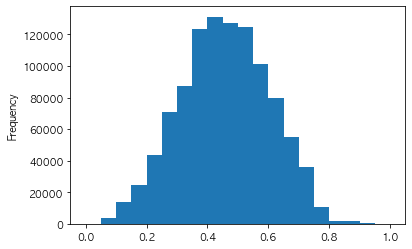

In [15]:
(df['values']).plot.hist(bins=20) # 그림을 그려서 정규화가 잘 되었는지 확인

# 고객, 상품별로 데이터 묶기

In [16]:
df_groupby = df.groupby(['cust','pd_nm'], as_index=False)
df_groupby = df_groupby.sum()
df_groupby.head()

,cust,pd_nm,buy_ct,buy_am,de_dt_month,de_day,총합,뉴스심리지수,values
0,M000225114,가공계란,0.000000,0.506106,0.272727,0.166667,0.221591,0.730805,0.371708
1,M000225114,가공우유,0.011236,0.394239,0.181818,0.166667,0.176136,0.457880,0.212480
2,M000225114,과일음료,0.022472,0.820168,1.636364,1.000000,0.375000,0.905191,1.044250
3,M000225114,과일잼,0.000000,0.899535,0.545455,0.333333,0.443182,1.461610,0.708232
4,M000225114,과채혼합음료,0.000000,0.394239,0.272727,0.166667,0.153409,0.603979,0.275883


In [17]:
print("shape:",df_groupby.shape)
print("중복 데이터:", df_groupby.duplicated().sum())

shape: (391480, 9)
중복 데이터: 0


In [18]:
df_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391480 entries, 0 to 391479
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cust         391480 non-null  object 
 1   pd_nm        391480 non-null  object 
 2   buy_ct       391480 non-null  float64
 3   buy_am       391480 non-null  float64
 4   de_dt_month  391480 non-null  float64
 5   de_day       391480 non-null  float64
 6   총합           391480 non-null  float64
 7   뉴스심리지수       391480 non-null  float64
 8   values       391480 non-null  float64
dtypes: float64(7), object(2)
memory usage: 26.9+ MB


In [19]:
df_groupby.isnull().sum() # 결측치 확인

cust           0
pd_nm          0
buy_ct         0
buy_am         0
de_dt_month    0
de_day         0
총합             0
뉴스심리지수         0
values         0
dtype: int64

# 데이터 저장

In [20]:
# 데이터를 빠르게 로드할 수 있게 피클로 저장
df_groupby.to_pickle('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/User-based_filtering_data_pickle_최종')